<a href="https://colab.research.google.com/github/joy1303125/Kaggle-competition/blob/main/Digits_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

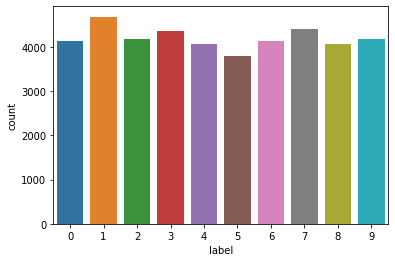

In [4]:
import seaborn as sns
sns.countplot(train['label'])
train['label'].value_counts()

In [5]:
orig_labels = train['label']
y = tf.keras.utils.to_categorical(orig_labels) # one-hot encoding
train.drop('label', axis=1, inplace=True)
train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train_arr = np.array(train).reshape(-1, 28, 28, 1)
test_arr = np.array(test).reshape(-1, 28, 28, 1)

In [7]:
train = train_arr/255.0
test = test_arr/255.0

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size = 0.1, random_state=2)

In [14]:
checkpoint_path = "logs/checkpoints/"

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu', padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

epochs=50

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor="accuracy",
                                        save_best_only=True,
                                        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=15)
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train, y, epochs=epochs, callbacks=callbacks, batch_size=64)

Epoch 1/50
657/657 [==============================] - 3s 5ms/step - loss: 0.3496 - accuracy: 0.8909
Epoch 2/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0975 - accuracy: 0.9720
Epoch 3/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0718 - accuracy: 0.9792
Epoch 4/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 5/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0532 - accuracy: 0.9845
Epoch 6/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 7/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0486 - accuracy: 0.9859
Epoch 8/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0420 - accuracy: 0.9875
Epoch 9/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0396 - accuracy: 0.9882
Epoch 10/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0366 - accuracy: 0.9886

In [27]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)

datagen.fit(X_train)

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import models

np.random.seed(2)

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu', padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

epochs=50

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor="accuracy",
                                        save_best_only=True,
                                        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=15)
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train, y, epochs=epochs, callbacks=callbacks, batch_size=64)

Epoch 1/50
657/657 [==============================] - 3s 5ms/step - loss: 0.3503 - accuracy: 0.8888
Epoch 2/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0967 - accuracy: 0.9711
Epoch 3/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0765 - accuracy: 0.9770
Epoch 4/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0628 - accuracy: 0.9817
Epoch 5/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0553 - accuracy: 0.9830
Epoch 6/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 7/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0454 - accuracy: 0.9865
Epoch 8/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0454 - accuracy: 0.9863
Epoch 9/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0397 - accuracy: 0.9877
Epoch 10/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0369 - accuracy: 0.9888

In [28]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu', padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

epochs=50

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor="accuracy",
                                        save_best_only=True,
                                        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=15)
]

model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
history = model1.fit_generator(datagen.flow(X_train,Y_train, batch_size=64),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 64
                              ,  callbacks=callbacks)

Epoch 1/50
590/590 - 10s - loss: 0.5000 - accuracy: 0.8401 - val_loss: 0.0742 - val_accuracy: 0.9802
Epoch 2/50
590/590 - 10s - loss: 0.1488 - accuracy: 0.9567 - val_loss: 0.0867 - val_accuracy: 0.9776
Epoch 3/50
590/590 - 9s - loss: 0.1180 - accuracy: 0.9653 - val_loss: 0.0512 - val_accuracy: 0.9845
Epoch 4/50
590/590 - 9s - loss: 0.1015 - accuracy: 0.9705 - val_loss: 0.0480 - val_accuracy: 0.9874
Epoch 5/50
590/590 - 10s - loss: 0.0877 - accuracy: 0.9745 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 6/50
590/590 - 9s - loss: 0.0799 - accuracy: 0.9761 - val_loss: 0.0356 - val_accuracy: 0.9876
Epoch 7/50
590/590 - 9s - loss: 0.0756 - accuracy: 0.9785 - val_loss: 0.0339 - val_accuracy: 0.9917
Epoch 8/50
590/590 - 9s - loss: 0.0700 - accuracy: 0.9791 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 9/50
590/590 - 9s - loss: 0.0708 - accuracy: 0.9793 - val_loss: 0.0761 - val_accuracy: 0.9800
Epoch 10/50
590/590 - 9s - loss: 0.0629 - accuracy: 0.9812 - val_loss: 0.0364 - val_accuracy: 0.9

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
 
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [38]:
from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#plot_confusion_matrix(confusion_mtx, classes = range(10)) 
confusion_mtx

array([[411,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 479,   0,   0,   0,   0,   0,   3,   3,   0],
       [  0,   0, 402,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 417,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 452,   0,   2,   0,   0,   7],
       [  0,   0,   0,   2,   0, 367,   2,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1, 410,   0,   2,   0],
       [  0,   0,   2,   1,   0,   0,   0, 443,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0, 381,   0],
       [  1,   0,   0,   0,   1,   0,   0,   1,   0, 406]])

In [40]:
test.shape

(28000, 28, 28, 1)

In [39]:
results = model1.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [43]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("digits_cnn_data_gen.csv",index=False)

In [44]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [47]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("digits_cnn.csv",index=False)